<a href="https://colab.research.google.com/github/tinypenguin-Bang/Machine-Deep-Learning-HW/blob/main/2021251496_%EB%B0%A9%EC%A3%BC%ED%98%95_%EA%B3%BC%EC%A0%9C2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST, Fashion MNIST 데이터 분류 CNN 모델

*   Tensorflow 라이브러리 불러오기
*   Tensorflow 내의 MNIST 데이터셋 가져오기 (MNIST : 숫자 손글씨 데이터)


*   train / test set 저장


In [ ]:
import tensorflow as tf                                   # Tensorflow 라이브러리
mnist = tf.keras.datasets.mnist                           # Tensorflow에 내장된 MNIST 데이터셋 가져오기

(x_train, y_train), (x_test, y_test) = mnist.load_data()  # MNIST 데이터셋 기반 train / test 데이터셋 저장


*   데이터 type 및 shape 확인

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

*   60000개의 train data와 10000개의 test data 확인
*   이미지 데이터당 (28,28) 배열 확인
*   60000개의 train data의 성능 확인을 위해 5000개를 validation set으로 변경 (검증 set)

In [ ]:
# train set 에서 5000개를 validation set으로 변경
x_val, y_val = x_train[55000:,:], y_train[55000:]
x_train, y_train = x_train[:55000, :], y_train[:55000]

In [ ]:
print(x_train.shape)  # 학습 set
print(x_val.shape)    # 검증 set

(55000, 28, 28)
(5000, 28, 28)


*   Numpy 라이브러리 불러오기
*   train / test set 데이터 표준화 (전처리)

In [ ]:
# train / test set 데이터 표준화 (전처리)
import numpy as np
mean = np.mean(x_train, axis=0)  # 평균 (28 x 28 이미지)

In [ ]:
mean.shape

(28, 28)

In [ ]:
std = np.std(x_train)    # 표준편차

In [ ]:
std

78.5901436214457

In [ ]:
x_train_centered = (x_train-mean)/std     # 학습 데이터 표준화
x_val_centered = (x_val-mean)/std         # 검증 데이터 표준화
x_test_centered = (x_test-mean)/std       # 테스트 데이터 표준화

In [ ]:
x_train_centered.shape

(55000, 28, 28)

*   One Hot Encoding (데이터를 단순한 숫자에서 수많은 0과 하나의 1이 있는 1차원 배열로 변경하는 것)
*   keras를 활용, to_categorical() 함수를 통해 One Hot Encoding으로 변경 가능

In [ ]:
# one hot encoding
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

In [ ]:
print(y_train[0])
print(y_train_onehot[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


*   CNN 모델 만들기
*   keras 활용, layers와 models 도입하여 parameter 설정

In [ ]:
# model 만들기

from tensorflow.keras import layers, models

model = models.Sequential()       # 모델 선언

In [ ]:
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))   # 1st 2D Conv. layer

In [ ]:
model.add(layers.MaxPool2D(2,2))                                        # 1st Pool. layer
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))  # 2nd 2D Conv. layer
model.add(layers.MaxPool2D(2,2))                                        # 2nd Pool. layer
model.add(layers.Flatten())                                             # Flatten layer

In [ ]:
# dense layer에 넣기
model.add(layers.Dense(1024, activation='relu'))                        # Dense layer (Relu 함수 기반 DNN)
model.add(layers.Dropout(0.5))                                          # Dropout layer (Overfitting 방지)
model.add(layers.Dense(10, activation='softmax'))                       # Classification layer (softmax 함수 기반)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 1024)             

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])       # loss function, optimizer, metrics 설정

In [ ]:
x_train_c = x_train_centered.reshape(-1, 28,28,1)  # -1은 추정으로 정한다
x_val_c = x_val_centered.reshape(-1,28,28,1)
x_test_c = x_test_centered.reshape(-1,28,28,1)

In [ ]:
history=model.fit(x_train_c, y_train_onehot, batch_size=64, epochs=20,
                  validation_data=(x_val_c, y_val_onehot))                            # training 진행, validation check 병행

Epoch 1/20
860/860 [==============================] - 9s 10ms/step - loss: 0.1392 - acc: 0.9571 - val_loss: 0.0408 - val_acc: 0.9884
Epoch 2/20
860/860 [==============================] - 10s 12ms/step - loss: 0.0475 - acc: 0.9851 - val_loss: 0.0508 - val_acc: 0.9876
Epoch 3/20
860/860 [==============================] - 8s 9ms/step - loss: 0.0354 - acc: 0.9890 - val_loss: 0.0439 - val_acc: 0.9896
Epoch 4/20
860/860 [==============================] - 7s 9ms/step - loss: 0.0265 - acc: 0.9913 - val_loss: 0.0313 - val_acc: 0.9918
Epoch 5/20
860/860 [==============================] - 7s 9ms/step - loss: 0.0216 - acc: 0.9934 - val_loss: 0.0373 - val_acc: 0.9902
Epoch 6/20
860/860 [==============================] - 8s 9ms/step - loss: 0.0221 - acc: 0.9933 - val_loss: 0.0378 - val_acc: 0.9914
Epoch 7/20
860/860 [==============================] - 7s 8ms/step - loss: 0.0176 - acc: 0.9943 - val_loss: 0.0435 - val_acc: 0.9914
Epoch 8/20
860/860 [==============================] - 7s 9ms/step - loss:

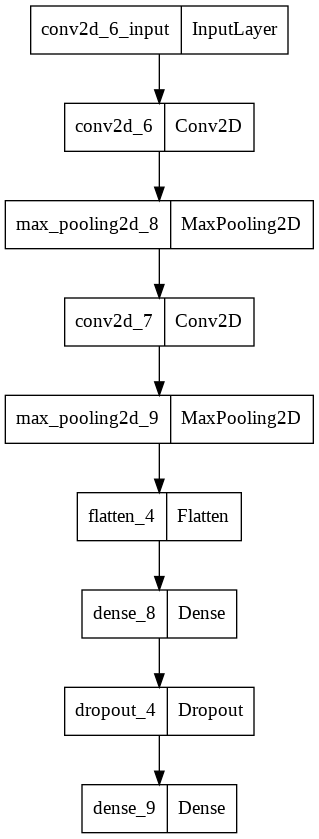

In [ ]:
# plot_model함수를 활용하면 도식화된 모델 구성이 출력됨
tf.keras.utils.plot_model(model)

In [ ]:
model.layers[0]

In [ ]:
model.layers[0].weights

[<tf.Variable 'conv2d_6/kernel:0' shape=(5, 5, 1, 32) dtype=float32, numpy=
 array([[[[-4.77816015e-02, -3.68653424e-03, -2.05252692e-02,
           -3.98275368e-02,  3.13494578e-02, -1.10600386e-02,
            3.27184908e-02,  8.87504816e-02, -9.64473858e-02,
            3.96749899e-02,  7.91740790e-03,  2.58514266e-02,
            6.10018484e-02,  4.81209457e-02, -3.36281732e-02,
            1.29248708e-01,  2.25441679e-02, -2.32310803e-03,
            4.14300635e-02, -3.99754457e-02,  3.11171506e-02,
           -9.69775841e-02,  4.88295928e-02,  1.30979806e-01,
           -2.45661698e-02, -5.46532031e-03,  1.67976215e-01,
            5.82817663e-03, -2.71246396e-02,  9.83306244e-02,
            4.77387272e-02,  7.34632537e-02]],
 
         [[-1.16227850e-01, -1.29296601e-01, -8.05779360e-04,
           -2.38867532e-02, -1.35768384e-01, -4.49619703e-02,
            4.73773619e-03,  1.30630761e-01,  7.43689910e-02,
            6.04443513e-02, -7.11987764e-02, -4.15650494e-02,
       

In [ ]:
model.layers[0].weights[0].shape

TensorShape([5, 5, 1, 32])

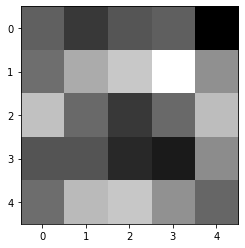

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(model.layers[0].weights[0][:,:,0,0], cmap='gray')

In [ ]:
# conv2d 확인

conv2d_1 = models.Model(inputs=model.input, outputs=model.layers[0].output)

In [ ]:
conv2d_out = conv2d_1.predict(x_train_c[[0]])

In [ ]:
x_train_c.shape

(55000, 28, 28, 1)

In [ ]:
conv2d_out.shape

(1, 24, 24, 32)

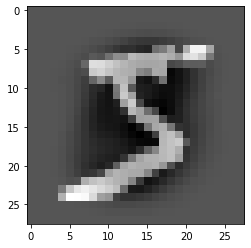

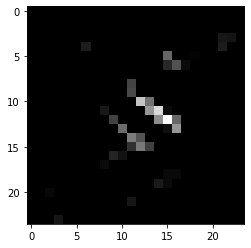

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train_c[0,:,:,0], cmap='gray')  # 원본
plt.figure()
plt.imshow(conv2d_out[0,:,:,1],cmap='gray')  # convolution

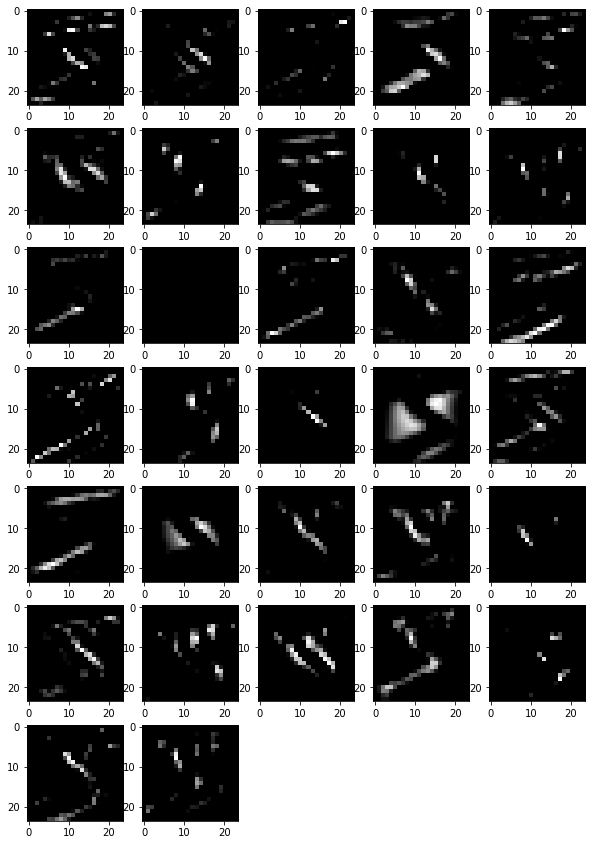

In [ ]:
# 32개 필터 적용된 것 확인
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(conv2d_out[0,:,:,i], cmap='gray')

In [ ]:
maxpool_1 = models.Model(inputs=model.input, outputs=model.layers[1].output)

In [ ]:
maxpool_out = maxpool_1.predict(x_train_c[[0]])

In [ ]:
maxpool_out.shape

(1, 12, 12, 32)

In [ ]:
maxpool_out.max()

1.658797

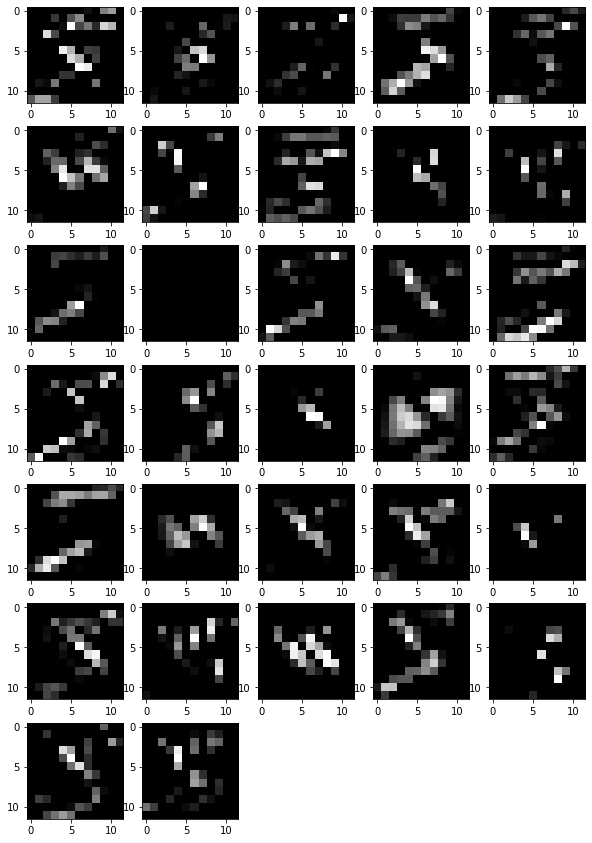

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(maxpool_out[0,:,:,i], cmap='gray')

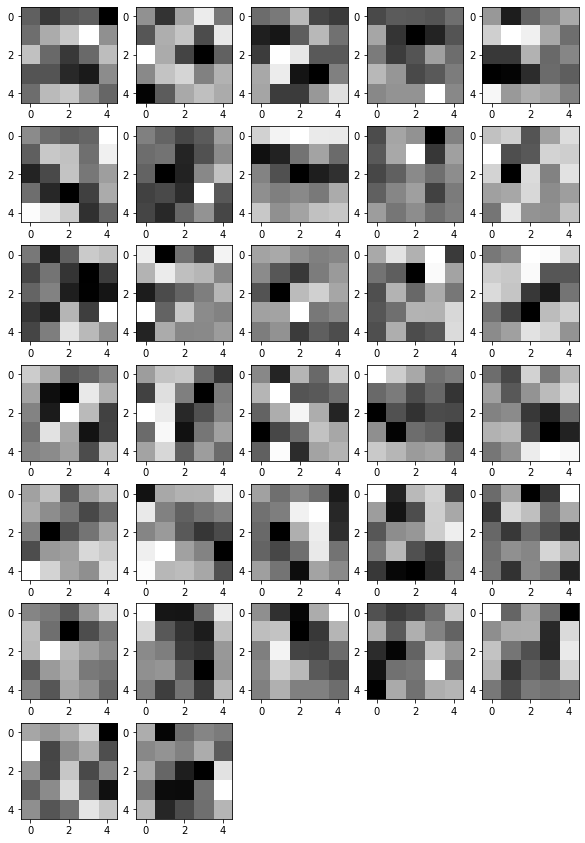

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(model.layers[0].kernel[:,:,0,i], cmap='gray')
plt.show()

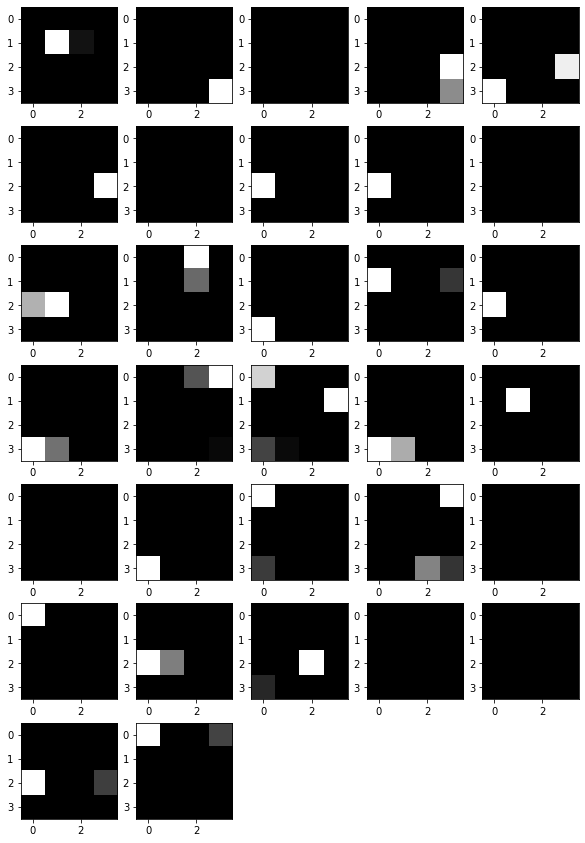

In [ ]:
maxpool_3 = models.Model(inputs=model.input, outputs=model.layers[3].output)
maxpool_out = maxpool_3.predict(x_train_c[[0]])
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(maxpool_out[0,:,:,i], cmap='gray')
plt.show()

In [ ]:
flat = models.Model(inputs=model.input, outputs=model.layers[4].output)
flat_out = flat.predict(x_train_c[[0]])

In [ ]:
flat_out

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.64151686]], dtype=float32)

In [ ]:
import pandas as pd
flat_df = pd.Series(flat_out[0])

In [ ]:
flat_df.describe()

count    1024.000000
mean        0.071709
std         0.344818
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.116655
dtype: float64

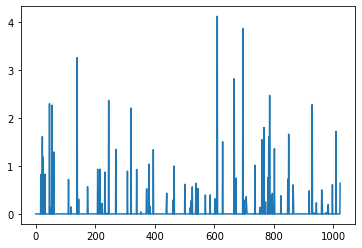

In [ ]:
flat_df.plot()

# Fashion MNIST

In [203]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [204]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [205]:
test_images.shape

(10000, 28, 28)

In [206]:
train_images.shape

(60000, 28, 28)

In [207]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

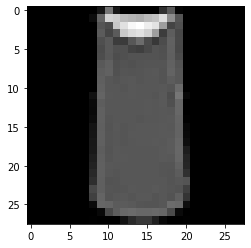

In [208]:
plt.figure()
plt.imshow(train_images[2], cmap='gray')

In [209]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [210]:
label_df = pd.Series(train_labels)
label_df.value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [211]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [212]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

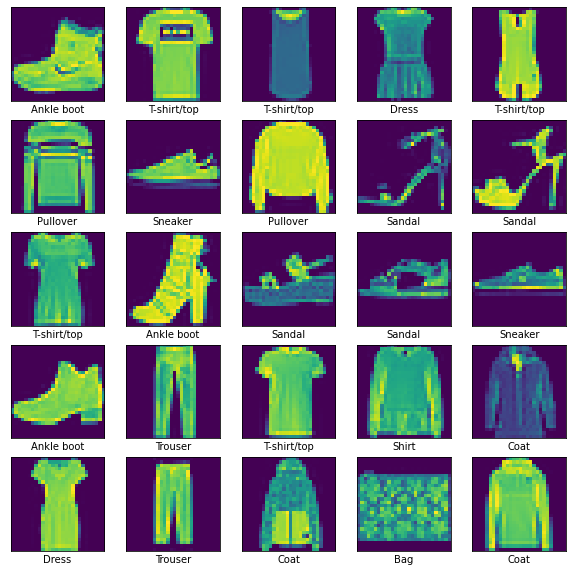

In [213]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [214]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4996 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3741 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3367 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3124 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2970 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2793 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2692 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2569 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2483 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

In [215]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.3423 - accuracy: 0.8836 - 1s/epoch - 4ms/step


In [216]:
predictions = model.predict(test_images)

In [217]:
predictions.shape

(10000, 10)

In [218]:
predictions[0]

array([1.5742460e-05, 1.8297911e-08, 4.9445934e-08, 1.9646176e-13,
       3.5964743e-07, 3.0524196e-02, 5.4390142e-07, 3.2426313e-02,
       1.6131588e-09, 9.3703276e-01], dtype=float32)

In [219]:
predictions[0].max()

0.93703276

In [220]:
np.argmax(predictions[0])

9

In [221]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

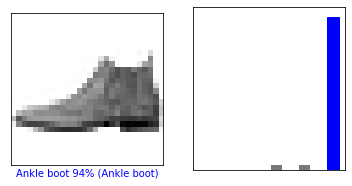

In [222]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

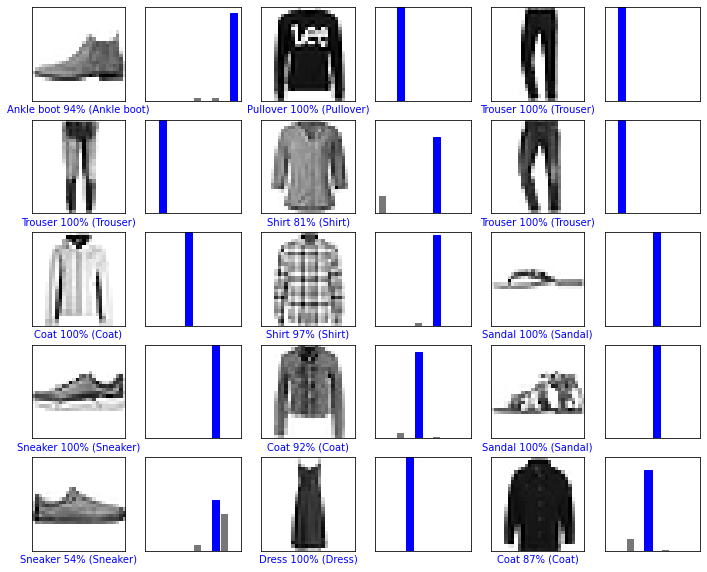

In [223]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [224]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[8]

print(img.shape)

(28, 28)


In [225]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [226]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.5077772e-05 1.8078756e-06 7.3177387e-07 1.4163996e-07 6.0809379e-07
  9.9976736e-01 1.4145732e-05 1.8607439e-04 3.5374417e-06 4.7127352e-07]]


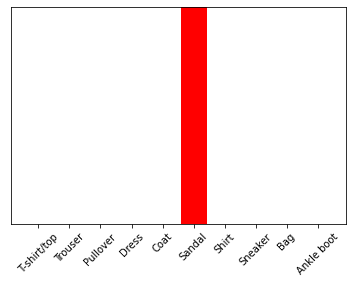

In [227]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)